# 载入套件

In [1]:
from typing import Dict
from tqdm.auto import tqdm

import numpy as np
import random
import pandas as pd
import ydata_profiling

import scienceplots
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

import torch
import os

%matplotlib inline

pd.plotting.register_matplotlib_converters()
sns.set_style("whitegrid")
sns.set_palette("RdBu")
sns.set(
    rc={'text.usetex': True},
    font="serif",
    font_scale=1.2
)

days = {i: pd.read_pickle(f'../Datasets/day{str(i).zfill(2)}.pkl')
        for i in range(1, 22)}


# 工具函数

In [2]:
SEED = 20230723


def same_seed(seed=SEED):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


same_seed()


# 辅助表格


app_class.csv，共两列。第一列是appid,给出4000多个常用APP所属类别（app_class）,比如：社交类、影视类、教育类等，用英文字母a-t表示，共20个常用得所属类别，其余APP不常用，所属类别未知。

In [3]:
# 辅助表格，常用APP类别
# 发现：原始表格存在重复值
app = pd.read_csv('../Datasets/app_class.csv', header=None).drop_duplicates()
app.columns = ['appid', 'app_class']

# 副本：不锁定数据格式
app_copy = app.copy()

# 约束数据格式
app['appid'] = app['appid'].astype('category')
app['app_class'] = app['app_class'].astype('category')

# 打印行列数、概况
print('app:', app.shape)
pd.DataFrame(app.value_counts('app_class'))
app.describe()


app: (4197, 2)


,appid,app_class
count,4197,4197
unique,4197,20
top,4,t
freq,1,1559


In [4]:
# 21天内监测数据中共有36435种app_id
appid = set({})
for i in range(1, 22):
    appid = appid.union(days[i]['appid'].unique())
len(appid)


36437

In [5]:
# NaN
val = pd.DataFrame({'appid': list(appid)})
val = val.merge(app_copy, on='appid', how='left')
val[val['app_class'].isna()].shape


(32506, 2)

In [6]:
# a～t
val['app_class'].dropna().shape


(3931,)

/Users/durui/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


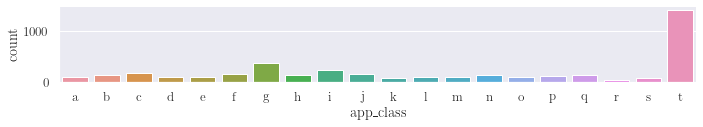

In [7]:
sns.catplot(kind='count', data=val.sort_values(by='app_class'),
            x='app_class', height=2, aspect=10/2)

plt.savefig("../Thesis/figures/app_class_countplot_in_days.pdf",
            dpi=400, bbox_inches='tight', pad_inches=0)


In [8]:
pd.DataFrame(val.fillna('NaN').value_counts(
    ['app_class'])).sort_values(by='count')


,count
app_class,
r,41
k,81
s,82
e,88
d,90
o,97
m,97
l,97
a,105
